# Daily Coding Problem 14: Find $\pi$ using a Monte Carlo Method

The area of a circle is defined as $\pi r^{2}$. Estimate $\pi$ to 3 decimal places using a Monte Carlo method.


## Visualising the Geometry

The equation of a circle whose centre is at the origin is:

\begin{equation}
r^{2} = x^{2} + y^{2}
\end{equation}
where $r$ is the radius of the circle. As a circle can be thought of as a polygon with an infinite number of sides, a line plot joining a significantly large number of points along the edge of the circle can approximate its shape. Both $x$- and $y$-values vary from $-r$ to $r$, assuming that the centre of the circle lies at the origin. Given the $x$-position, the equation of a circle can be rearranged to yield an equation for $y$:

\begin{equation}
y = \pm\sqrt{\left(r^{2} - x^{2}\right)}
\end{equation}

Simply plotting the positive $y$-values as a function of $x$ will result in a semi-circle. It is necessary to include the negative $y$-values and their corresponding $x$-positions to complete the circle.

This produces the circle below, inscribed in a square of side $2r$:

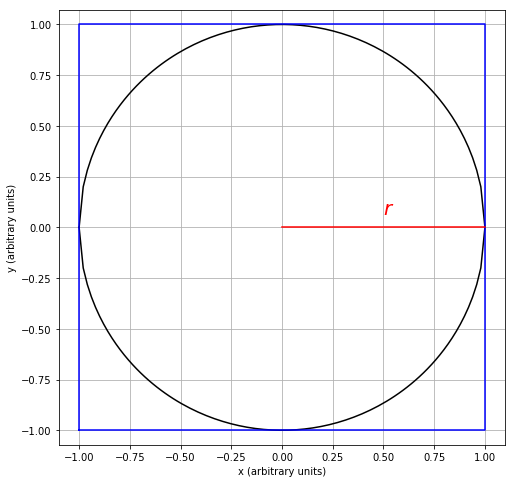

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import random

def CirclePoints(x, r):
    """Given list of x-coordinates, returns two lists of y-coordinates to plot circle around origin."""
    return np.sqrt(r**2 - x**2), -np.sqrt(r**2 - x**2)

def SquarePoints(r):
    """Given radius of circle, return vertices of square in which circle is inscribed."""
    x = [-r, -r, r, r, -r]
    y = [-r, r, r, -r, -r]
    return x, y

circle_radius = 1.0   # Define radius r of circle

x = np.linspace(-circle_radius, circle_radius, int(circle_radius)*100)   # x-coordinates

# y-coordinates for semi-circles at positive and negative y-values
y_pos, y_neg = CirclePoints(x, circle_radius)
y = np.append(y_pos, list(reversed(y_neg)))   # Merge y-coordinates

# Append x-coordinates with x-values for negative y-positions
x = np.append(x, list(reversed(x)))

# Draw circle
fig0 = plt.figure(figsize=(8,8), facecolor='w', edgecolor='k')
plt.plot(x, y, color='k')
plt.grid()
plt.axis('equal')
plt.xlabel("x (arbitrary units)")
plt.ylabel("y (arbitrary units)")

# Draw square in which circle is inscribed
x_sq, y_sq = SquarePoints(circle_radius)
plt.plot(x_sq, y_sq, color='b')

# Draw line to represent radius of circle
plt.plot([0.0, circle_radius], [0.0, 0.0], color='red')
plt.annotate(r"$r$", xy=(circle_radius/2, circle_radius/16.0), color='r', size=20)

plt.show()

## Determination of $\pi$

The area of the circle $A_{c}$ is given by $\pi r^{2}$. The circle is incribed by a square of area $A_{s} = 2r\times 2r = 4r^{2}$. Therefore, the ratio of $A_{c}$ to $A_{s}$ is given by:

\begin{equation}
\frac{A_{c}}{A_{s}} = \frac{\pi r^{2}}{4r^{2}} = \frac{\pi}{4}
\end{equation}

It is apparent from the diagram above that $A_{c} < A_{s}$, therefore it can be inferred that $\pi < 4$. The equation of the ratios can be rearranged to yield one for $\pi$:

\begin{equation}
\pi = 4\frac{A_{c}}{A_{s}}
\end{equation}

In order to lie within the square, a point must have coordinates such that $-r\le x\le r$ and $-r\le y\le r$. If this point also lies within the boundaries of the circle, from the equation of the circle above, it must have coordinates such that:

\begin{equation}
r\ge \sqrt{x^{2} + y^{2}}
\end{equation}

By generating a large number of points with coordinates that lie within the square, and determining the proportion of these that lie within the circle, the ratio $\frac{A_{c}}{A_{s}}$ can be approximated.

The following line can be commented out should the random seed not be predetermined:

In [88]:
# Set random seed; comment out if random seed is not predetermined
random.seed(1)

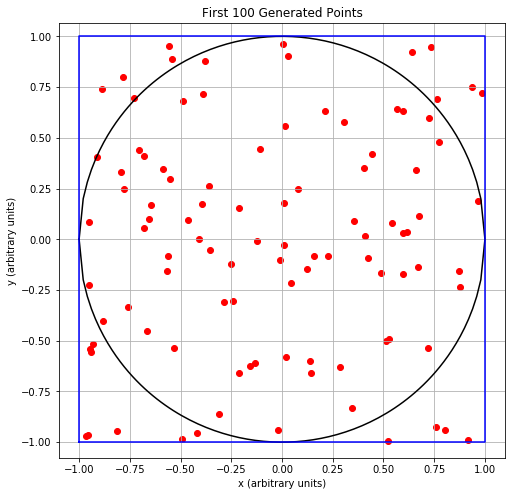

In [89]:
def WithinCircleCheck(x, y, r):
    """Determines whether point with coordinates (x,y) lies within circle of radius r and returns True if so."""
    return r > np.sqrt(x**2 + y**2)

n_points = 1000000   # Number of points to be generated

# Generate lists of x- and y-coordinates for points that lie within the square
points_x = []
points_y = []
for point in range(n_points):
    points_x.append(random.uniform(-circle_radius, circle_radius))
    points_y.append(random.uniform(-circle_radius, circle_radius))

points_x = np.array(points_x)
points_y = np.array(points_y)

# Boolean array to determine whether each generated point lies within circle
within_circle = WithinCircleCheck(points_x, points_y, circle_radius)

# Plot positions of first 100 generated points
if n_points < 100:
    n_plot = n_points
else:
    n_plot = 100

fig1 = plt.figure(figsize=(8,8), facecolor='w', edgecolor='k')
plt.plot(x, y, color='k')
plt.grid()
plt.axis('equal')
plt.xlabel("x (arbitrary units)")
plt.ylabel("y (arbitrary units)")
plt.plot(x_sq, y_sq, color='b')

plt.scatter(points_x[:n_plot], points_y[:n_plot], color='r')
plt.title("First {} Generated Points".format(n_plot))

plt.show()

As shown by the positions of the first few generated points above, a proportion of them lie within the circle. Using the equation for $\pi$ given above, its value can be determined by multiplying the proportion of these points by four:

In [90]:
def Determine_pi(prop_in_circle):
    """Returns estimation of pi based on proportion of points that lie within circle."""
    return 4 * list(prop_in_circle).count(True) / float(len(prop_in_circle))

# Print value of pi to 3 decimal places
print("The value of pi = {:.3f}".format(Determine_pi(within_circle)))

The value of pi = 3.141


## The Point of Diminishing Returns

It would be interesting to see how quickly the value converges.

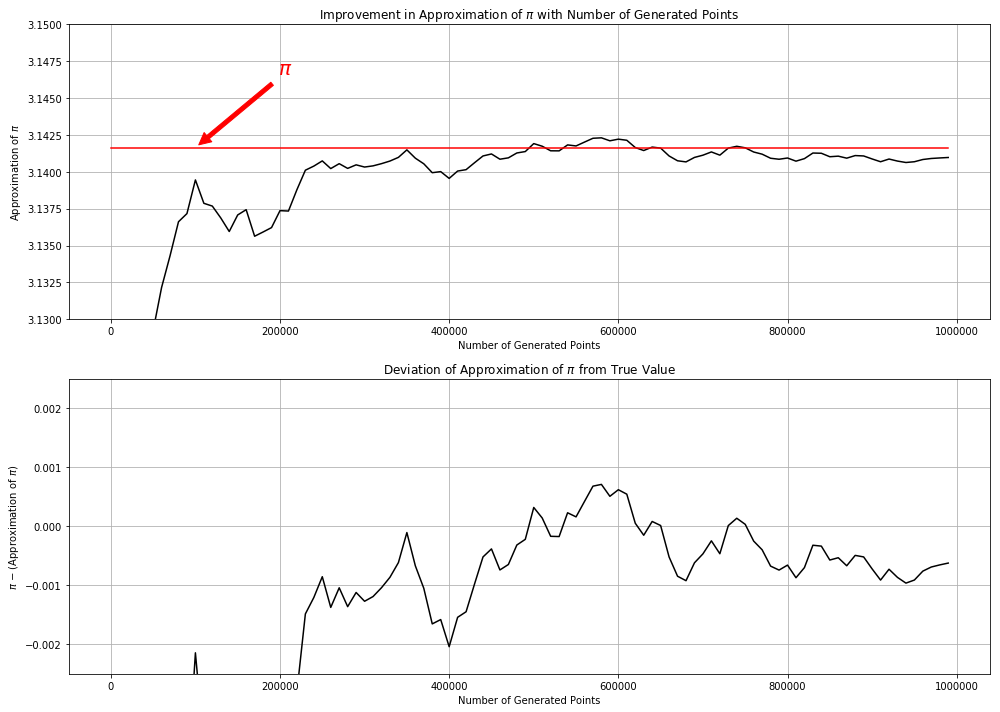

In [91]:
# Lists for pi values and points at sampling positions
pi_values = []
point_gen = []

# Take sample of 100 points and determine pi approximations
for point in range(0, n_points, n_points//n_plot):
    pi_values.append(Determine_pi(within_circle[:point+1]))
    point_gen.append(point+1)

# Plot evolution of approximate pi value with number of generated points
fig2 = plt.figure(figsize=(14,10), facecolor='w', edgecolor='k')
plt.subplot(2, 1, 1)
plt.plot(point_gen, pi_values, color='k')
plt.plot([point_gen[0], point_gen[-1]], [np.pi, np.pi], color='r')
# Show line for pi on plot
plt.annotate(r"$\pi$", xy=(point_gen[-1]/10, np.pi), xytext=(point_gen[-1]/5, np.pi+0.005),
             color='r', size=20, arrowprops=dict(facecolor='r', edgecolor='r', shrink=0.05))
plt.grid()
plt.ylim(3.13, 3.15)
plt.title(r"Improvement in Approximation of $\pi$ with Number of Generated Points")
plt.xlabel("Number of Generated Points")
plt.ylabel(r"Approximation of $\pi$")

# Plot deviation of approximate pi value from true value
plt.subplot(2, 1, 2)
pi_residual = np.array(pi_values) - np.pi
plt.plot(point_gen, pi_residual, color='k')
plt.grid()
plt.ylim(-0.0025, 0.0025)
plt.title(r"Deviation of Approximation of $\pi$ from True Value")
plt.xlabel("Number of Generated Points")
plt.ylabel(r"$\pi$ $-$ (Approximation of $\pi$)")

plt.tight_layout()
plt.show()

After about 100,000 generated points, the value of $\pi$ can be approximated to 2 decimal places with reasonable confidence. As expected, as the number of generated points increases, the deviation from the expected value of $\pi$ decreases. However, the magnitude of these improvements decreases with each successive generated point.

It is difficult to state with certainty where the point of diminishing returns lies. In the case of determining $\pi$ to 2 decimal places, it could be said that this point lies after 100,000 generations as no improvement is seen beyond this point. However, the problem asks for a solution to 3 decimal places. After approximately 450,000 points have been generated, the approximate value of $\pi$ lies within the boundaries $3.141\le \pi\le 3.143$. It can be argued that beyond this point, little improvement in the approximation is seen and its value is close enough to the true value to provide a valid answer.